In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel('iris.xls')

In [4]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# handling missing values

In [5]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [6]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

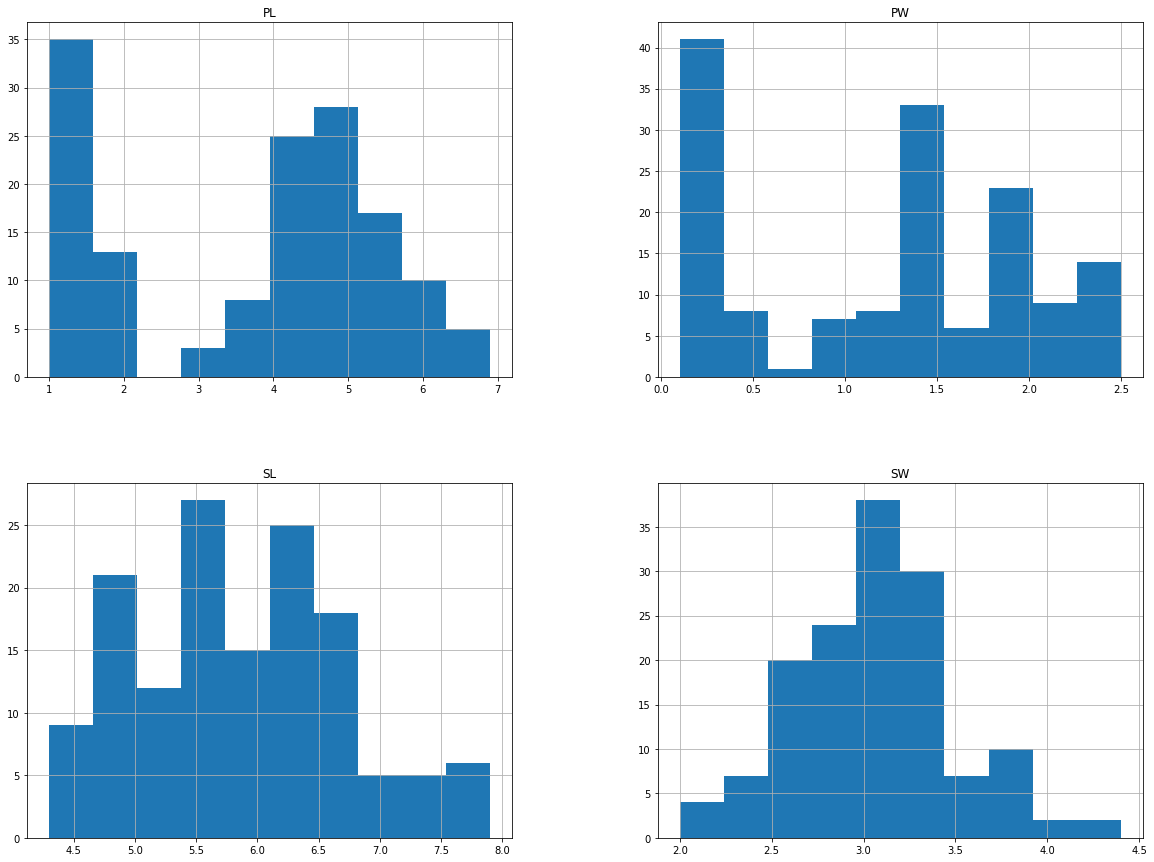

In [7]:
freqgraph = data.select_dtypes(include=['float'])     
freqgraph.hist(figsize=(20,15))
plt.show()

In [38]:
data['PL'] = data['PL'].fillna(data['PL'].median())

In [39]:
data.isna().sum()

SL                7
SW                6
PL                0
PW                0
Classification    0
dtype: int64

In [41]:
for i in ['SL', 'SW']:
    data[i] = data[i].fillna(data[i].mean())

In [42]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# All missing values are filled

# outlier detection

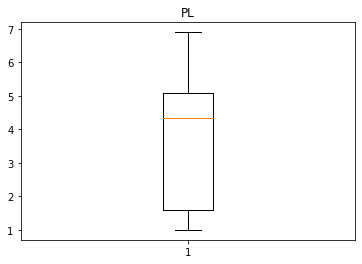

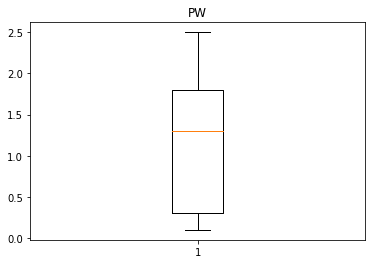

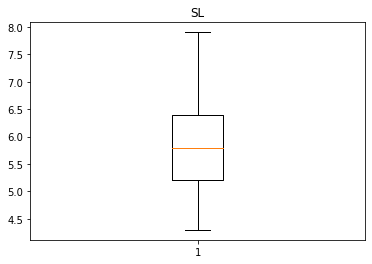

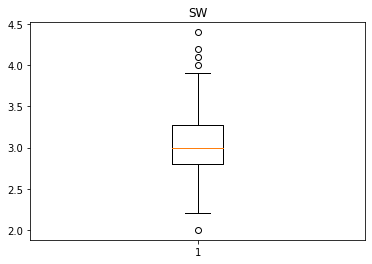

In [44]:
for i in ['PL', 'PW', 'SL', 'SW']:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [46]:
Q1 = np.percentile(data['SW'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['SW'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['SW'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR

In [49]:
print(low_lim)
print(up_lim)

2.1249999999999996
3.9250000000000003


In [47]:
ind1 = data['SW']<low_lim
data.loc[ind1].index

Int64Index([60], dtype='int64')

In [48]:
ind2 = data['SW']>up_lim
data.loc[ind2].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [51]:
data.drop([14, 15, 32, 33, 60], inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x24c601c8cc8>,
 'caps': [<matplotlib.lines.Line2D at 0x24c601c8e88>,
 'boxes': [<matplotlib.lines.Line2D at 0x24c601c8508>],
 'medians': [<matplotlib.lines.Line2D at 0x24c601ccf48>],
 'fliers': [<matplotlib.lines.Line2D at 0x24c601ac188>],
 'means': []}

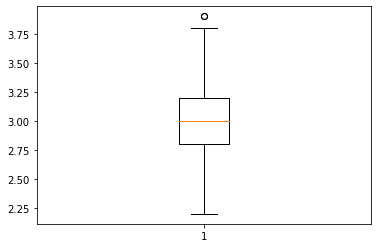

In [52]:
plt.boxplot(data['SW'])

# outliers are eliminated

# label encoding

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])

In [56]:
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


In [57]:
data['Classification'].unique()

array([0, 1, 2])

# splitting

In [59]:
X = data.drop(['Classification'], axis=1)
y = data['Classification']

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [61]:
X_train.shape

(116, 4)

In [62]:
X_test.shape

(29, 4)

# LR

In [63]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred = logit_model.predict(X_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        29
   macro avg       0.93      0.93      0.93        29
weighted avg       0.93      0.93      0.93        29



# kNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

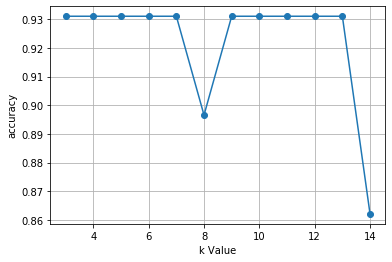

In [71]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [75]:
classifier = KNeighborsClassifier(n_neighbors=3, metric='minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        29
   macro avg       0.93      0.93      0.93        29
weighted avg       0.93      0.93      0.93        29



# SVM

In [78]:
from sklearn.svm import SVC
sm = SVC()
sm.fit(X_train, y_train)
y_pred = sm.predict(X_test)

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.73      0.89      0.80         9
           2       0.89      0.73      0.80        11

    accuracy                           0.86        29
   macro avg       0.87      0.87      0.87        29
weighted avg       0.87      0.86      0.86        29



# Decision tree

In [80]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.80      0.89      0.84         9
           2       0.90      0.82      0.86        11

    accuracy                           0.90        29
   macro avg       0.90      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29



# Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()
rc.fit(X_train, y_train)
y_pred = rc.predict(X_test)

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        29
   macro avg       0.93      0.93      0.93        29
weighted avg       0.93      0.93      0.93        29



# Scaling

In [77]:
X.describe()

,SL,SW,PL,PW
count,145.000000,145.000000,145.000000,145.000000
mean,5.870287,3.025489,3.847586,1.226897
std,0.816690,0.374355,1.712265,0.758219
min,4.300000,2.200000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.855944,3.000000,4.350000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.900000,3.900000,6.900000,2.500000


In [86]:
from sklearn.preprocessing import StandardScaler
standardisation = StandardScaler()
X_train = standardisation.fit_transform(X_train)
X_test = standardisation.fit_transform(X_test)

In [87]:
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred = logit_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.82      1.00      0.90         9
           2       1.00      0.82      0.90        11

    accuracy                           0.93        29
   macro avg       0.94      0.94      0.93        29
weighted avg       0.94      0.93      0.93        29



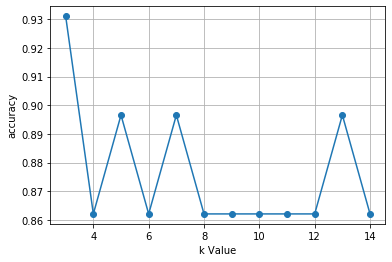

In [88]:
metric_k = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [90]:
classifier = KNeighborsClassifier(n_neighbors=3, metric='minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        29
   macro avg       0.93      0.93      0.93        29
weighted avg       0.93      0.93      0.93        29



In [91]:
sm = SVC()
sm.fit(X_train, y_train)
y_pred = sm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        29
   macro avg       0.93      0.93      0.93        29
weighted avg       0.93      0.93      0.93        29



In [92]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.80      0.89      0.84         9
           2       0.90      0.82      0.86        11

    accuracy                           0.90        29
   macro avg       0.90      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29



In [93]:
rc = RandomForestClassifier()
rc.fit(X_train, y_train)
y_pred = rc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.73      0.89      0.80         9
           2       0.89      0.73      0.80        11

    accuracy                           0.86        29
   macro avg       0.87      0.87      0.87        29
weighted avg       0.87      0.86      0.86        29

